# CoRoT-1 b Analysis
With the Spectroscopy_RECTE_emcee_tshirt_pipeline ...

## Import Library

In [1]:
import sys
sys.path.insert(1, '/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/Generalized_Code/') #path to the pipeline.py file

import Spectroscopy_RECTE_emcee_tshirt #import pipeline code
from Spectroscopy_RECTE_emcee_tshirt import lightcurve_model

from tshirt.pipeline import spec_pipeline
import matplotlib.pyplot as plt

import yaml

Could not import ccdproc, so image processing may not work


Loading BokehJS ...

## Learn The Function Parameters

In [2]:
help(Spectroscopy_RECTE_emcee_tshirt)

Help on module Spectroscopy_RECTE_emcee_tshirt:

NAME
    Spectroscopy_RECTE_emcee_tshirt - #IMPORT LIBRARY:

CLASSES
    builtins.object
        lightcurve_model
    
    class lightcurve_model(builtins.object)
     |  #----------------------------------------------------------------------------------------
     |  
     |  Methods defined here:
     |  
     |  MCMC(self, tshirt_obj, model, iterations, int_guess=None, nbins=10, recalculate=False, showPlot=False, LCPlot=False)
     |      Optimizes batman model light curves (for transits and/or secondary eclipses) based on initial parameters. 
     |      This function does consider `RECTE` charge trapping parameters. 
     |      This function utilizies the `emcee` model fitting approach. 
     |      
     |      Parameters
     |      ----------
     |      tshirt_obj: keyword
     |          Time Series Helper & Integration Reduction Tool (tshirt) Spectrometry Object
     |      model: function
     |          A function that mode

## Read in the YAML file

Within the YAML file, edit the directories to match your data locations

In [3]:
planet_file="/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/Generalized_Code/CoRoT1b_TransitParams.yaml"
#read in yaml file on CoRoT-1 b 
with open(planet_file, "r") as stream:
    bparamfile = yaml.safe_load(stream)
    
bparamfile

{'procFiles': ['/fenrirdata1/es_tso/hst/visit01/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit02/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit03/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit04/*_flt.fits'],
 'excludeList': ['ibh717giq_flt.fits',
  'ibh719gkq_flt.fits',
  'ibh720i5q_flt.fits',
  'ibh721olq_flt.fits'],
 'srcName': 'CoRoT-1b',
 'srcNameShort': 'corot1',
 'nightName': ['visit1', 'visit2', 'visit3', 'visit4'],
 'dispDirection': 'x',
 'starPositions': [74],
 'refPhotCentering': None,
 'bkgSubDirections': ['Y'],
 'bkgRegionsX': [[None, None]],
 'bkgOrderX': 0,
 'bkgRegionsY': [[[9, 32], [41, 49], [92, 122]],
  [[0, 14], [25, 32], [39, 56], [100, 121]],
  [[9, 32], [39, 46], [92, 122]],
  [[9, 32], [39, 46], [92, 122]]],
 'bkgOrderY': 1,
 'apWidth': 30.0,
 'dispPixels': [0, 128],
 'numSplineKnots': 6,
 'splineSpecFitOrder': 2,
 'sigForBadPx': 300,
 'jdRef': 2457551,
 'timingMethod': None,
 'isCube': False,
 'cubePlane': 0,
 'doCentering': False,
 'FITSextension': 1,
 'HEADexten

In [4]:
bspec = spec_pipeline.batch_spec(batchFile=planet_file) #create a batch_spec object
#Return a spectrometry object for each visit so other methods and attributes can be explored
spec_v1 = bspec.return_spec_obj(ind=0)
spec_v2 = bspec.return_spec_obj(ind=1)
spec_v3 = bspec.return_spec_obj(ind=2)
spec_v4 = bspec.return_spec_obj(ind=3)

## Create a Light Curve Object

Create a light curve object for each visit of your data. With this light curve object we can explore various aspects. 

In [5]:
lc_obj_1 = lightcurve_model(spec_v1,planet_file)
lc_obj_2 = lightcurve_model(spec_v2,planet_file)
lc_obj_3 = lightcurve_model(spec_v3,planet_file)
lc_obj_4 = lightcurve_model(spec_v4,planet_file)

### Barycenter Correction Function

In [15]:
print(lc_obj_1.barycenter_correction(spec_v1)) #Find the barycenter correction in days 
print(lc_obj_2.barycenter_correction(spec_v2))
print(lc_obj_3.barycenter_correction(spec_v3))
print(lc_obj_4.barycenter_correction(spec_v4))

0.004808319425769107
0.004977836272850538
0.004683628509374105
0.004302484820503504


### Median Image Function

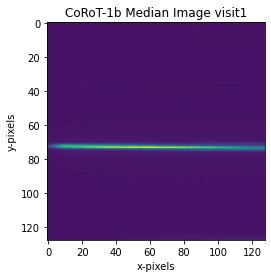

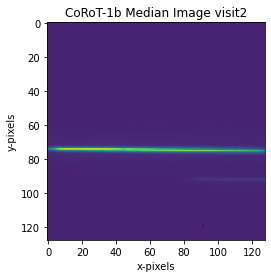

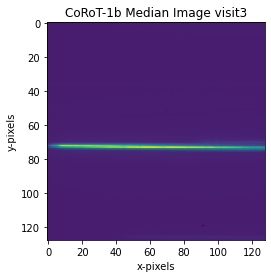

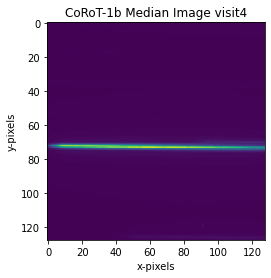

array([[ 1.42507285,  1.44072998,  1.43793553, ...,  1.41418475,
         1.39192188,  1.43035555],
       [ 1.70611435,  1.71611637,  1.64856911, ...,  1.76124412,
         1.78651607,  1.80226946],
       [ 1.37492919,  1.30126739,  1.34110212, ...,  2.30486274,
         2.36536336,  2.35418618],
       ...,
       [ 1.26997143,  1.3689698 ,  1.35582775, ...,  8.02316093,
         7.93879437,  7.9250989 ],
       [ 1.27831322,  1.31024176,  1.310112  , ..., 26.17031479,
        27.17902756, 26.27505684],
       [ 1.24142951,  1.33407342,  1.32947522, ..., 13.03933144,
        13.05330753, 13.41091585]])

In [16]:
%matplotlib inline

lc_obj_1.median_image(spec_v1, showPlot=True, recalculation = True)
lc_obj_2.median_image(spec_v2, showPlot=True, recalculation = True)
lc_obj_3.median_image(spec_v3, showPlot=True, recalculation = True)
lc_obj_4.median_image(spec_v4, showPlot=True, recalculation = True)

### Transit Model Function

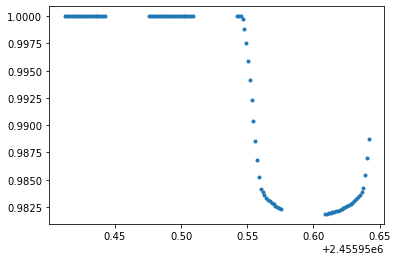

In [18]:
time = lc_obj_1.x
transit_model_flux = lc_obj_1.transit_model(time, 0.13,1,0) #only visit 1 is a transit in this data set 
plt.plot(time, transit_model_flux, '.')

### Transit Model Function with RECTE

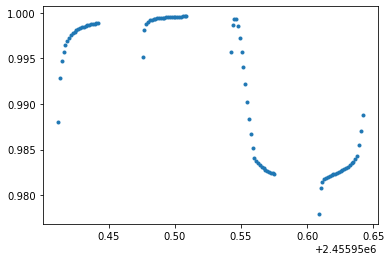

In [19]:
time = lc_obj_1.x
transit_model_RECTE_flux=lc_obj_1.transit_model_RECTE(time, 0.13,1,0,200,200,20,0)
plt.plot(time, transit_model_RECTE_flux, '.')

### Secondary Eclipse Model Function
Testing only one of the secondary eclipse visits

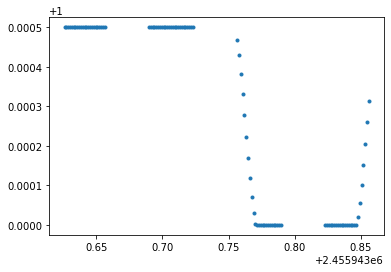

In [21]:
time_2 = lc_obj_2.x
eclipse_model_flux=lc_obj_2.eclipse_model(time_2, 500,1,0)
plt.plot(time_2, eclipse_model_flux, '.')

### Secondary Eclipse Model Function with RECTE
Testing only one of the secondary eclipse visits

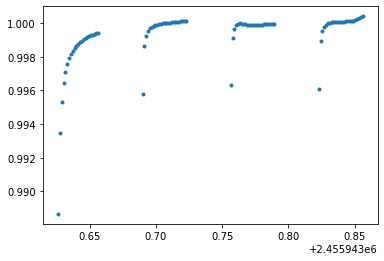

In [26]:
time_2 = lc_obj_2.x
eclipse_model_RECTE_flux=lc_obj_2.eclipse_model_RECTE(time_2, 500,1,0,200,200,20,0)
plt.plot(time_2, eclipse_model_RECTE_flux, '.')

### Optimize Batman Model
A function that optimizes the batman light curve model with a simply scipy curve_fit function. This function work with both secondary eclipses and Transits without the RECTE correction applied. Below is a test of one of the secondary eclipse visits. 

This model excludes the first orbit in each visit since the ramp profile is not considered. Use the interactive plot to determine at what index to trim the data:22


100%|██████████| 10/10 [00:00<00:00, 28986.21it/s]


optimize_batman_model: Multiprocessing Took 4.615826606750488 seconds
Figure and Data found in: /home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/Generalized_Code/Results/optimize_batman_model


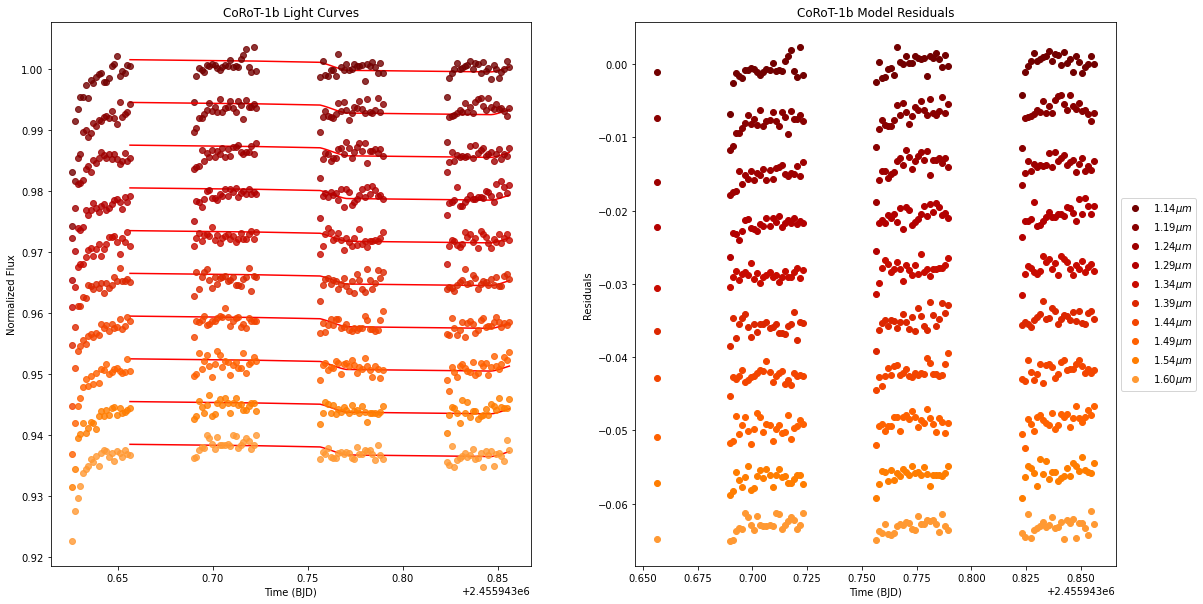

In [27]:
%matplotlib inline

lc_obj_2.optimize_batman_model(spec_v2, lc_obj_2.eclipse_model, nbins=10, int_guess=[500,1,0], showPlot=True, recalculate=True, useMultiprocessing=True)

### Optimize Batman Model with RECTE
A function that optimizes the batman light curve model with a simply scipy curve_fit function and with the RECTE correction to the ramp profiles applied. This function work with both secondary eclipses and Transits with the RECTE correction applied. Below is a test of one of the secondary eclipse visits. 

100%|██████████| 10/10 [00:00<00:00, 17168.66it/s]


optimize_batman_model_RECTE: Multiprocessing Took 23.909130096435547 seconds
Figure and Data found in: /home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/Generalized_Code/Results/optimize_batman_model_RECTE


([[array([ 7.89985295e+02,  1.00155044e+00, -6.20416021e-03,  1.06385923e-08,
           3.83350174e+01,  3.19688647e+01,  2.37846884e+01]),
   array([ 8.73470220e+02,  1.00106287e+00, -9.52075820e-04,  3.67741740e-09,
           8.46878896e-11,  4.10503760e+01,  2.26071106e+01]),
   array([6.62438214e+02, 1.00071431e+00, 4.08301625e-04, 1.94325057e+02,
          8.00377631e-09, 4.76058658e+01, 1.99525006e+01]),
   array([ 6.00787299e+02,  1.00089958e+00, -3.01969856e-03,  2.98780070e+02,
           3.18050561e+01,  2.14784623e+01,  2.47051312e+01]),
   array([ 9.22550186e+02,  1.00082076e+00, -4.73232069e-04,  1.65691536e-11,
           1.43783134e-07,  5.50421035e+01,  1.99140756e+01]),
   array([ 1.15442770e+03,  1.00103150e+00, -6.12349565e-03,  3.54904495e-08,
           1.65097183e+02,  3.98265743e+01,  1.12410719e+01]),
   array([ 1.00538520e+03,  1.00087646e+00, -1.06378642e-03,  4.04694245e-08,
           6.20110484e-10,  3.61708253e+01,  3.66344966e+01]),
   array([ 1.2013127

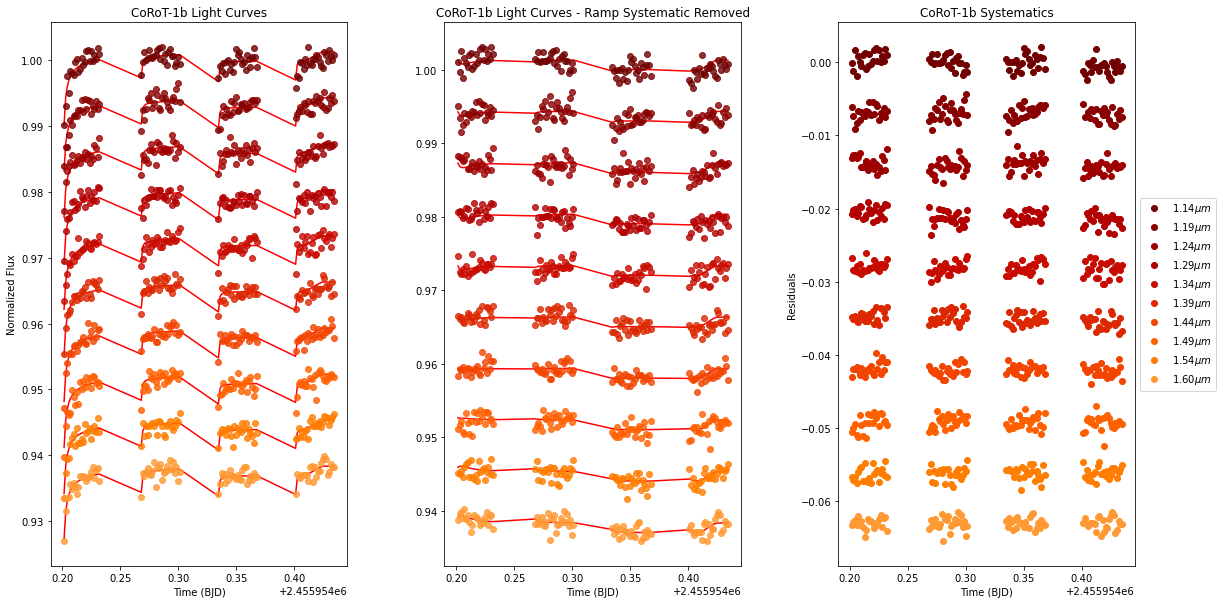

In [6]:
%matplotlib inline

lc_obj_3.optimize_batman_model_RECTE(spec_v3, lc_obj_3.eclipse_model_RECTE, nbins=10, int_guess=[500,1,0,200,20,20,0], showPlot=True, recalculate=True, useMultiprocessing=True)

### MCMC Function
A function that optimizes the batman light curve model with a MCMC fit with the RECTE correction to the ramp profiles applied. This function work with both secondary eclipses and Transits with the RECTE correction applied. Below is a test of one of the secondary eclipse visits. Note: This is testing 100 sample chains so warnings will pop up: `The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!` . In real testing use a longer chain. 

100%|██████████| 10/10 [00:00<00:00, 33770.56it/s]


optimize_batman_model_RECTE: Multiprocessing Took 24.23977518081665 seconds
Figure and Data found in: /home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/Generalized_Code/Results/optimize_batman_model_RECTE
Maximum Likelihood Estimation Took 0.0 Seconds


100%|██████████| 100/100 [01:37<00:00,  1.02it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 2;
tau: [ 8.7841789  11.14665536 11.06559772 10.5820285  11.74053924 12.95077986
 12.10980964]


MCMC Multiprocessing Analysis Took 98.5 Seconds


[700.   1.   0. 200. 200.  20.   0.]
Maximum Likelihood Estimation Took 0.4 Seconds


100%|██████████| 100/100 [01:38<00:00,  1.01it/s]
N/50 = 2;
tau: [11.2538263  10.29878191 11.93964508  8.18214615 12.67976567 12.62113492
 13.28154282]


MCMC Multiprocessing Analysis Took 99.2 Seconds


[700.   1.   0. 200. 200.  20.   0.]
Maximum Likelihood Estimation Took 0.4 Seconds


100%|██████████| 100/100 [01:36<00:00,  1.04it/s]
N/50 = 2;
tau: [10.87910186 11.33800044 11.30403159 12.10042706 10.70734515 10.19235121
 11.29659091]


MCMC Multiprocessing Analysis Took 97.1 Seconds


[700.   1.   0. 200. 200.  20.   0.]
Maximum Likelihood Estimation Took 0.4 Seconds


100%|██████████| 100/100 [01:37<00:00,  1.03it/s]
N/50 = 2;
tau: [ 8.45078447  9.97210948 10.7773527  12.73182172  9.76914141 12.24587612
 13.30952244]


MCMC Multiprocessing Analysis Took 97.7 Seconds


[700.   1.   0. 200. 200.  20.   0.]
Maximum Likelihood Estimation Took 0.4 Seconds


100%|██████████| 100/100 [01:36<00:00,  1.03it/s]
N/50 = 2;
tau: [ 8.71374661 11.2399008  12.43647836  8.7555223  11.46121337 13.20644396
  7.59651537]


MCMC Multiprocessing Analysis Took 97.4 Seconds


[700.   1.   0. 200. 200.  20.   0.]
Maximum Likelihood Estimation Took 0.4 Seconds


100%|██████████| 100/100 [01:36<00:00,  1.03it/s]
N/50 = 2;
tau: [10.93835153  9.58300012  9.56530225 12.38052464 10.14769428 12.27903798
 11.24709378]


MCMC Multiprocessing Analysis Took 97.4 Seconds


[700.   1.   0. 200. 200.  20.   0.]
Maximum Likelihood Estimation Took 0.4 Seconds


100%|██████████| 100/100 [01:36<00:00,  1.04it/s]
N/50 = 2;
tau: [11.19975667 10.05224158 10.70303159  9.46703819 10.33774023 13.54618175
 12.76873223]


MCMC Multiprocessing Analysis Took 96.9 Seconds


[700.   1.   0. 200. 200.  20.   0.]
Maximum Likelihood Estimation Took 1.1 Seconds


100%|██████████| 100/100 [01:35<00:00,  1.04it/s]
N/50 = 2;
tau: [ 8.8869474  12.38007315  9.99006524  9.89702433  9.24173602 12.41002051
 12.26327328]


MCMC Multiprocessing Analysis Took 96.5 Seconds
[700.   1.   0. 200. 200.  20.   0.]
Maximum Likelihood Estimation Took 0.4 Seconds


100%|██████████| 100/100 [01:36<00:00,  1.04it/s]
N/50 = 2;
tau: [11.14812432 12.00898346 11.82848867  9.69339879 10.97658571 12.93667561
 12.75286569]


MCMC Multiprocessing Analysis Took 96.9 Seconds


[700.   1.   0. 200. 200.  20.   0.]
Maximum Likelihood Estimation Took 0.4 Seconds


100%|██████████| 100/100 [01:37<00:00,  1.03it/s]
N/50 = 2;
tau: [10.5422648  11.28190884 11.95477054 10.66129597  8.42482617 13.24305236
 12.83925922]


MCMC Multiprocessing Analysis Took 98.2 Seconds


/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/corner/corner.py:271: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


([array([1.23256882e+03, 9.99124315e-01, 1.59195988e-03, 3.10986426e+02,
         1.83217133e+02, 4.03221751e+01, 5.93162855e+01]),
  array([1.09728445e+03, 9.98724289e-01, 9.16266190e-04, 2.64948595e+02,
         4.67536751e+02, 4.35607147e+01, 5.44089838e+01]),
  array([1.39412734e+03, 9.98650421e-01, 4.78744716e-03, 1.44758782e+02,
         2.68696627e+02, 8.45862336e+01, 8.73351745e+01]),
  array([2.63941842e+03, 9.98464385e-01, 3.59643158e-03, 1.51948570e+02,
         2.48015532e+02, 3.30411771e+01, 3.15168407e+01]),
  array([1.01458083e+02, 9.99640109e-01, 4.21353466e-03, 3.22858012e+02,
         2.76345838e+02, 6.38932800e+01, 4.51279128e+01]),
  array([ 4.91489069e+02,  1.00094289e+00, -3.82625461e-03,  1.79035716e+02,
          1.90817011e+02,  3.24928156e+01,  4.17629024e+01]),
  array([5.80623619e+02, 9.99611021e-01, 3.64742504e-03, 1.89093233e+02,
         2.07493519e+02, 2.35546731e+01, 4.46948576e+01]),
  array([6.69503192e+02, 1.00099726e+00, 2.13023393e-03, 2.45271494e+

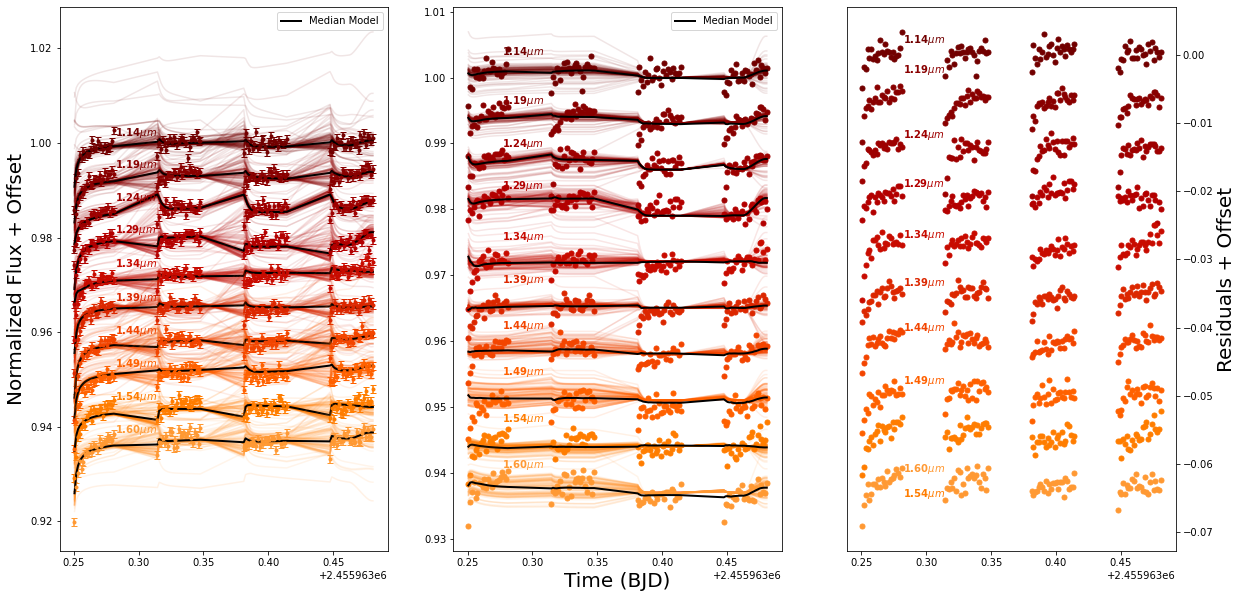

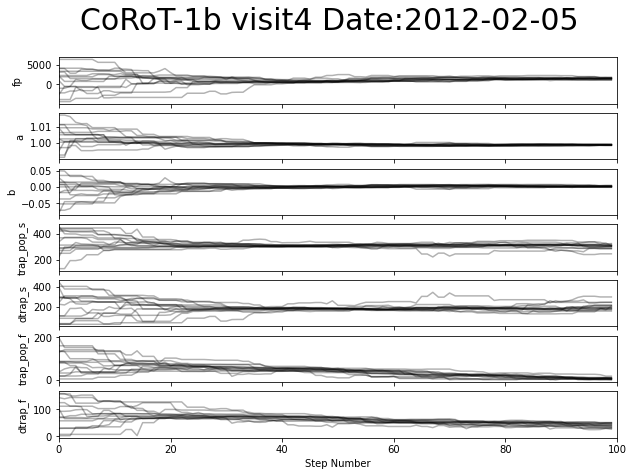

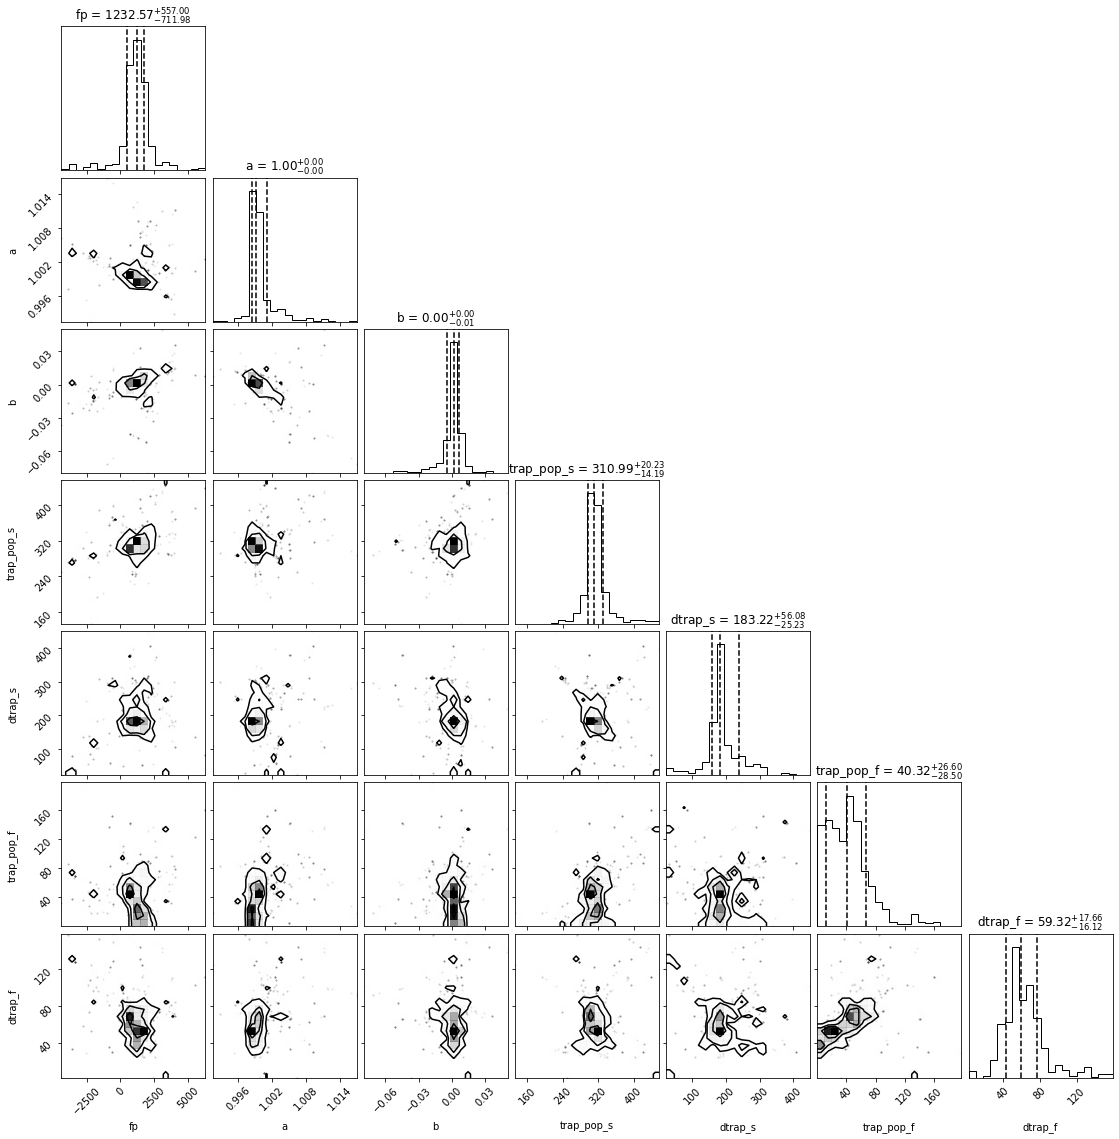

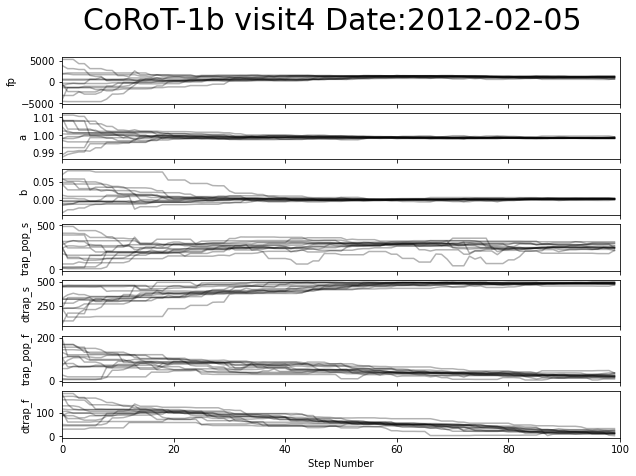

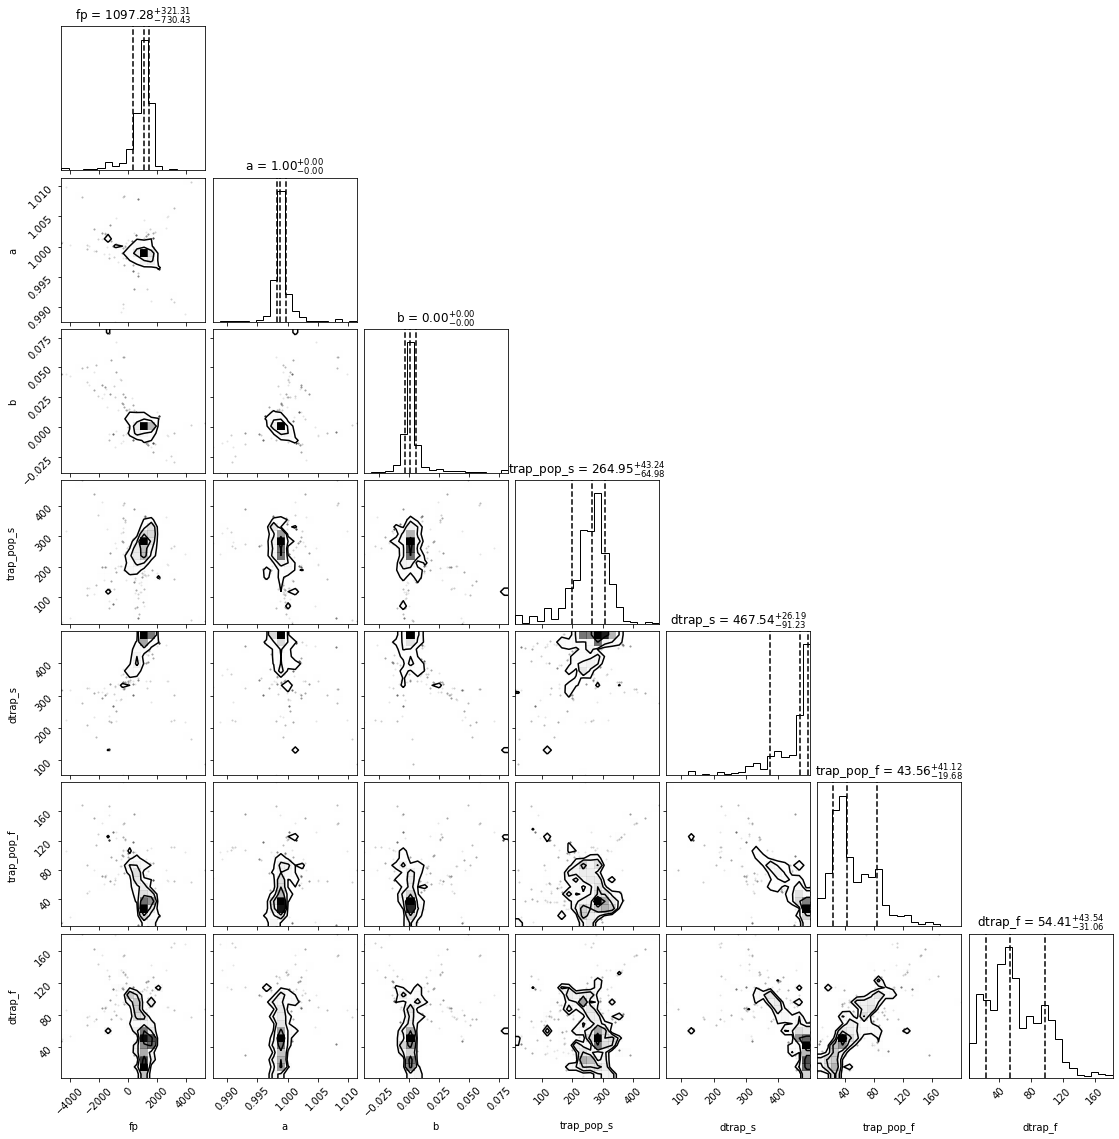

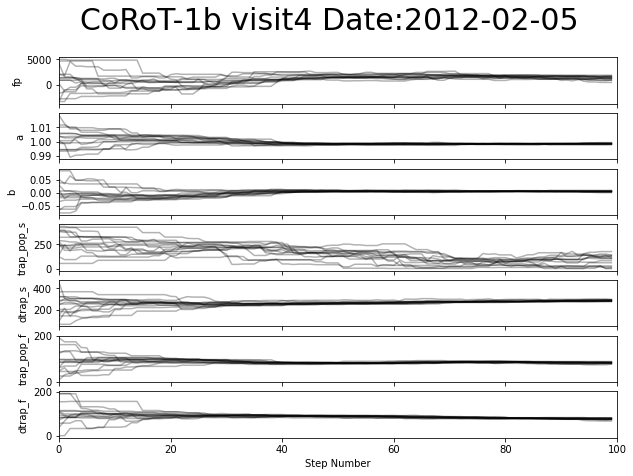

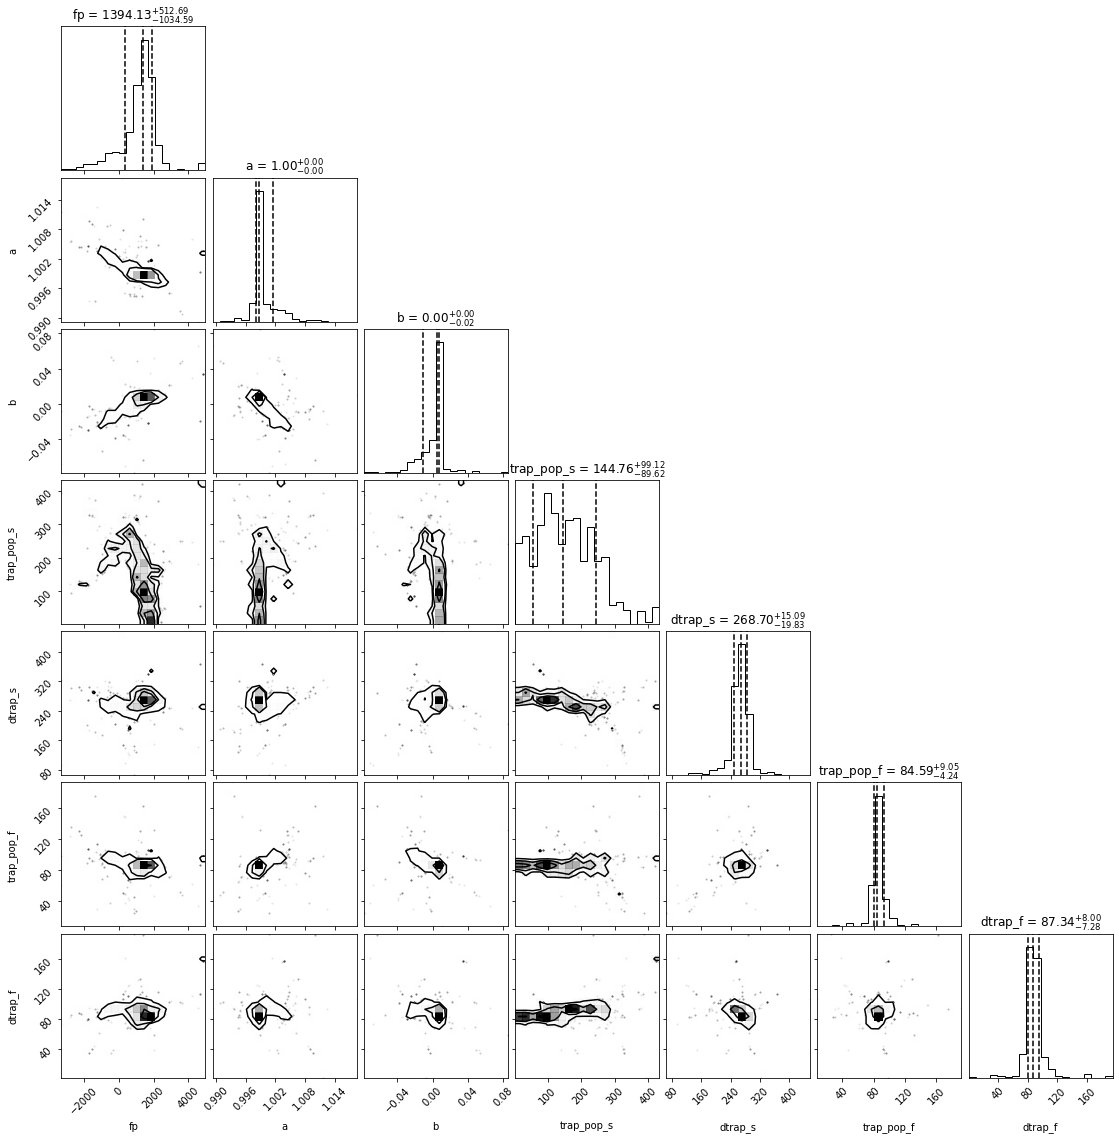

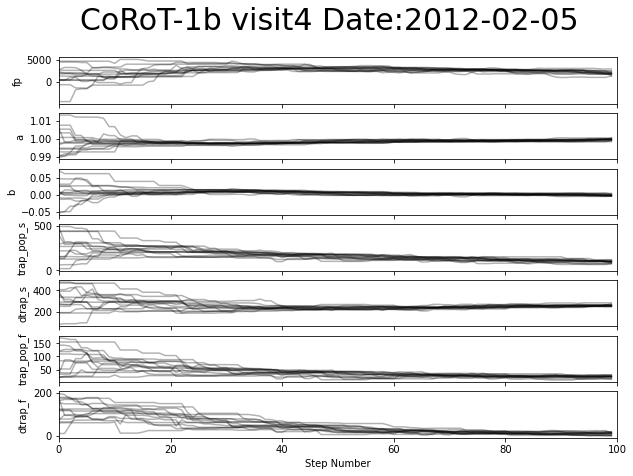

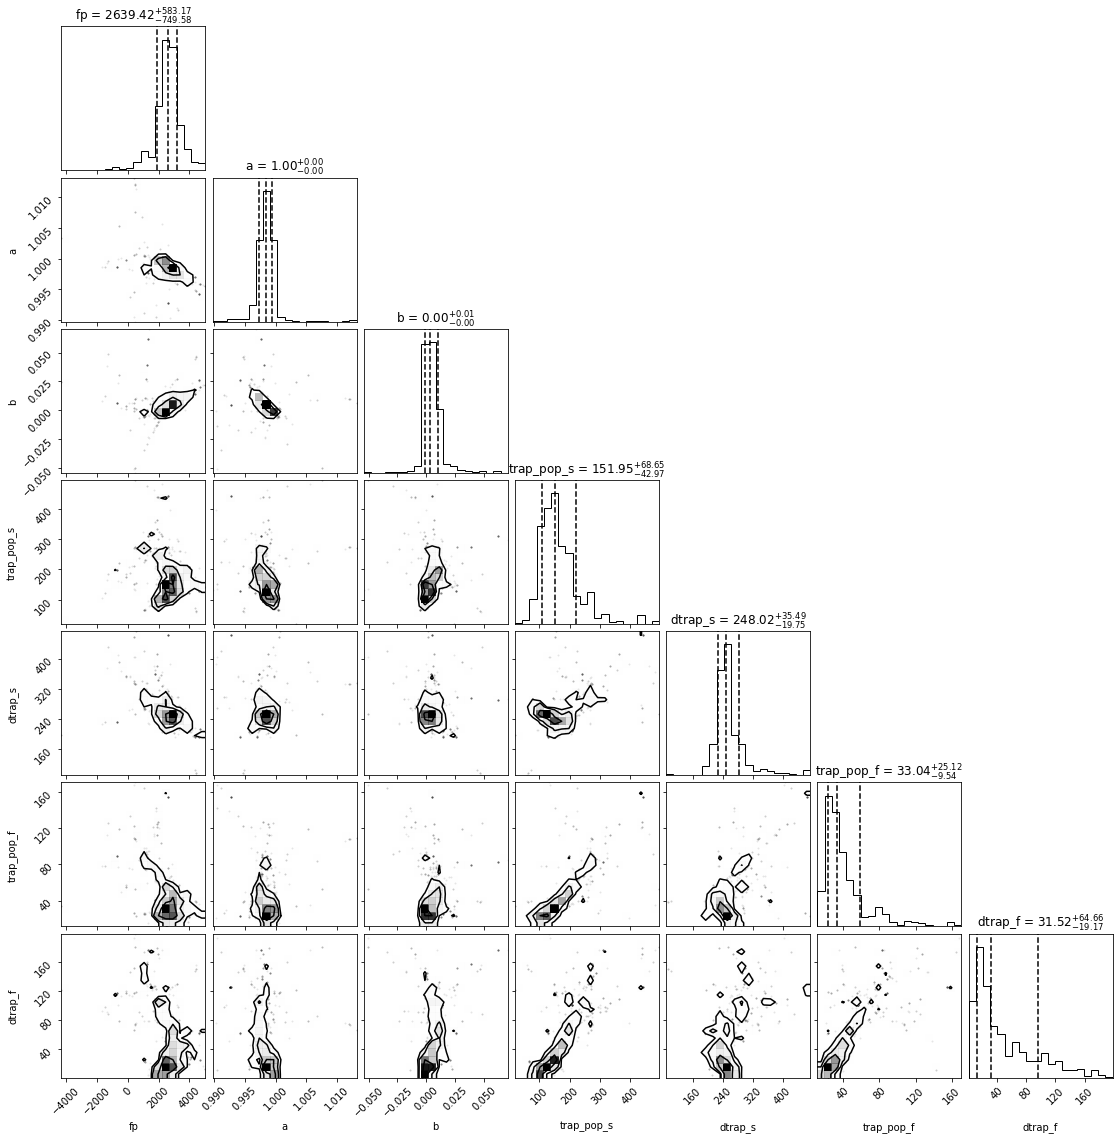

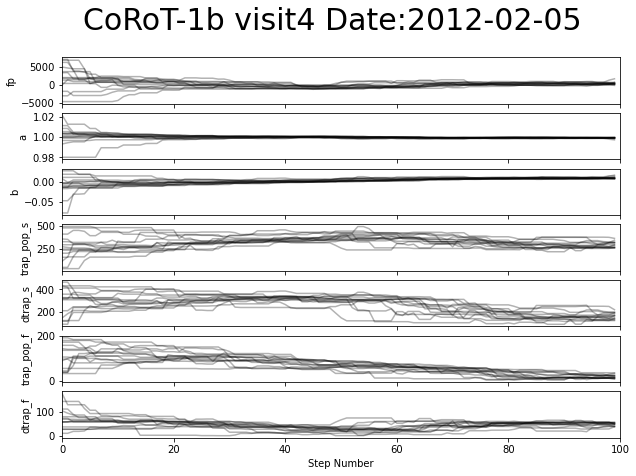

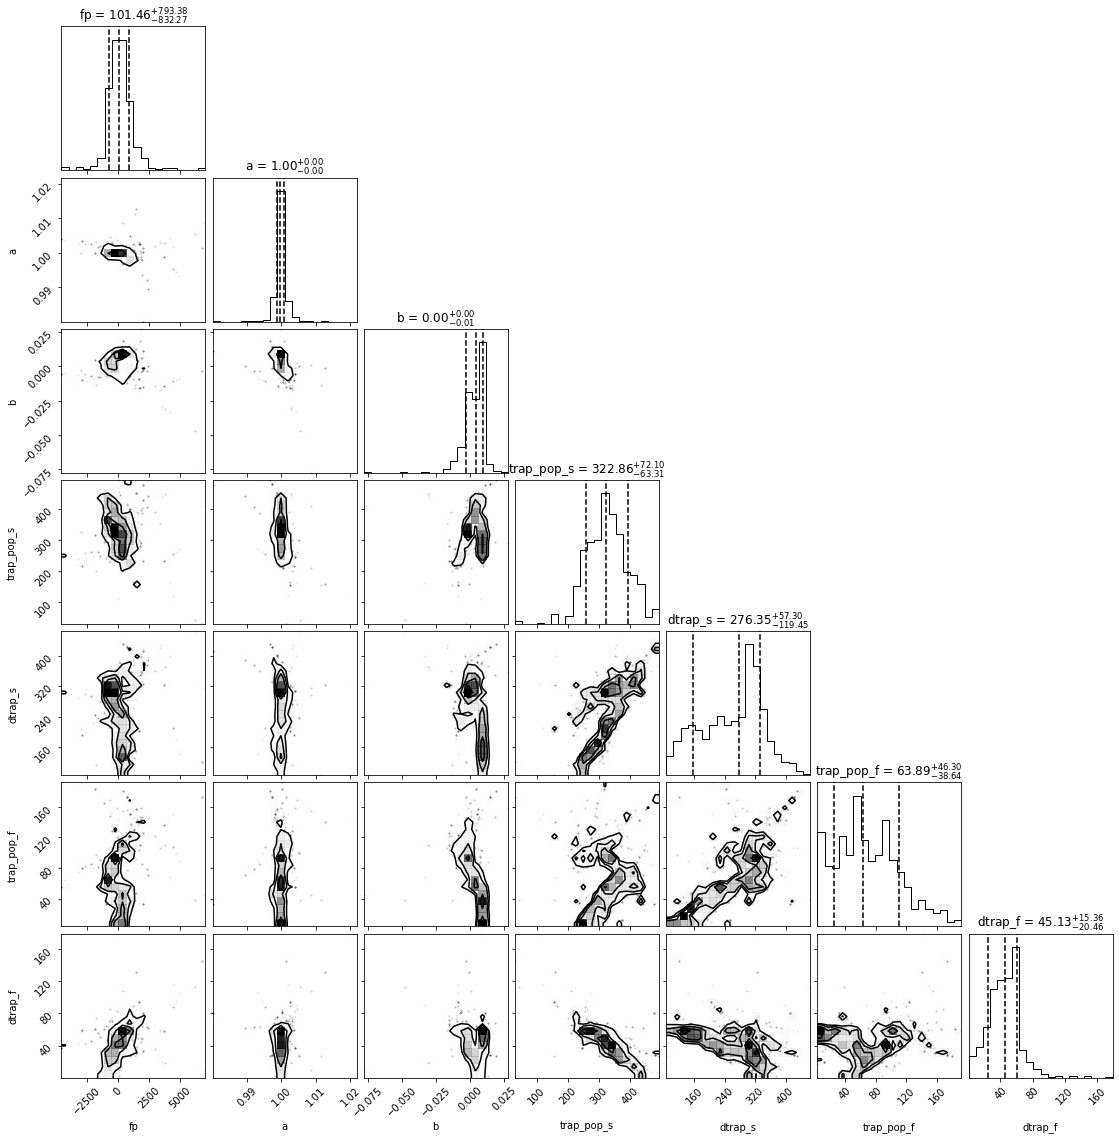

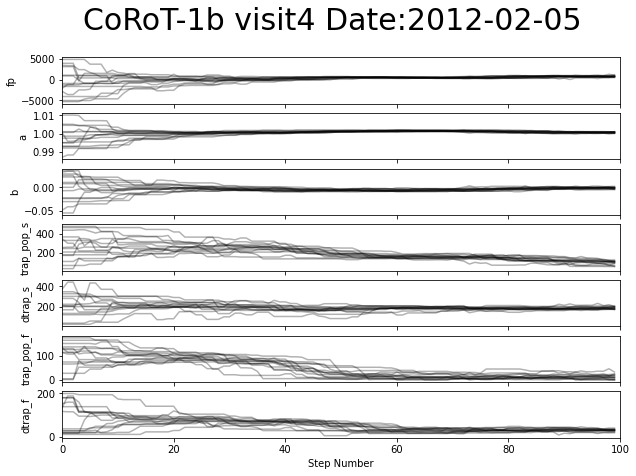

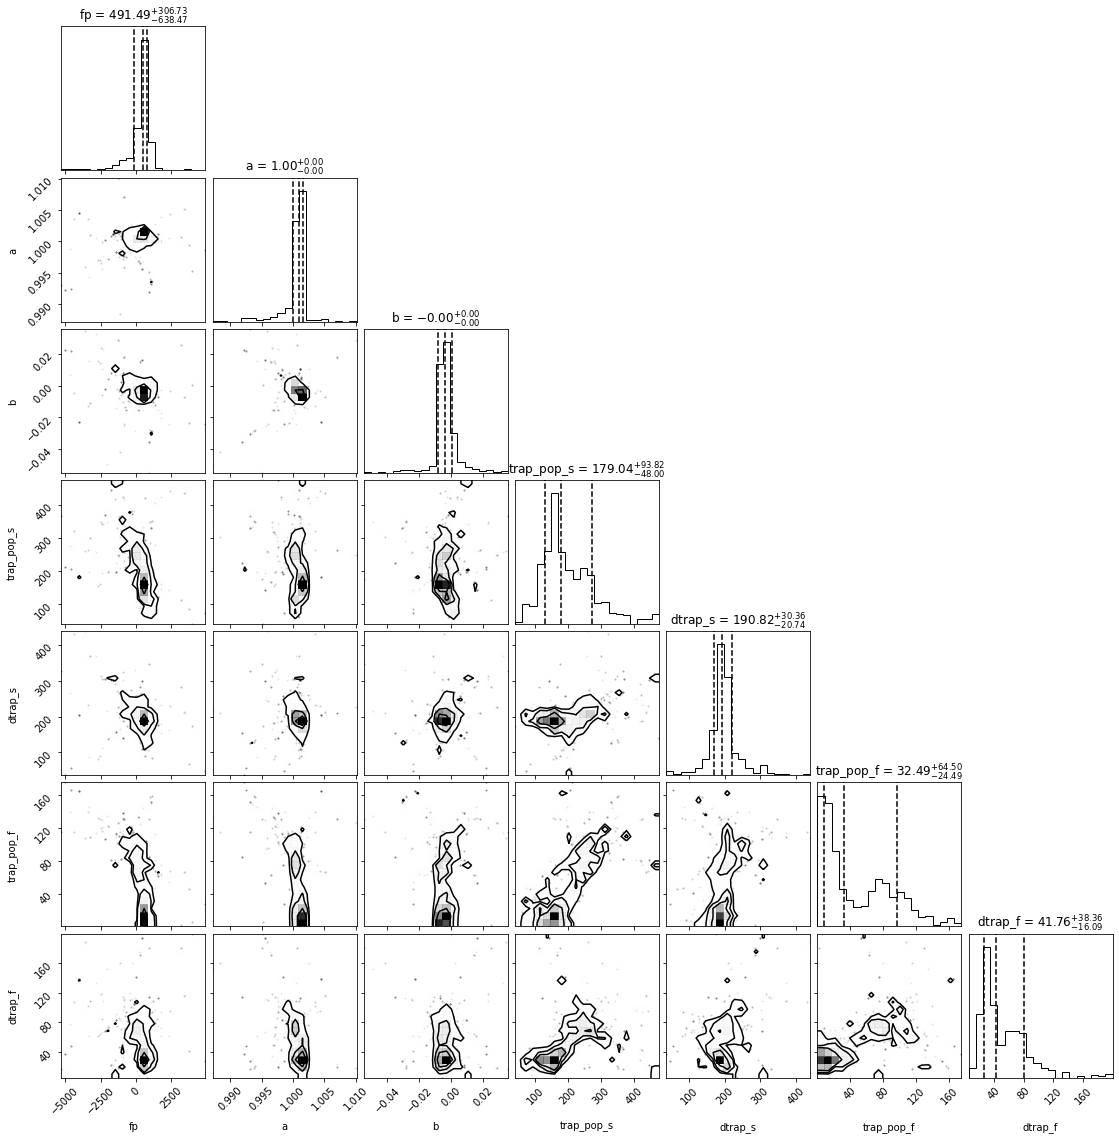

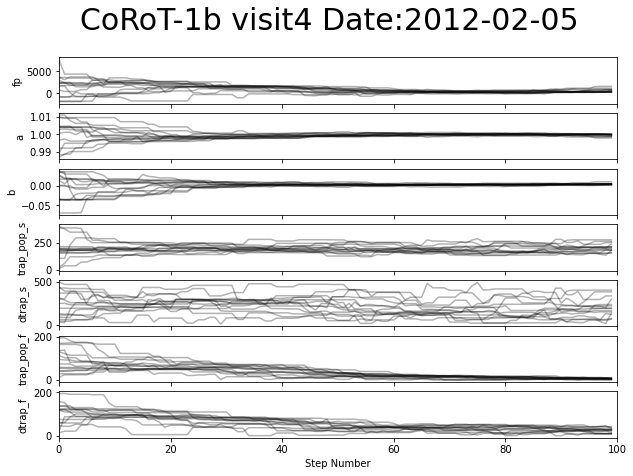

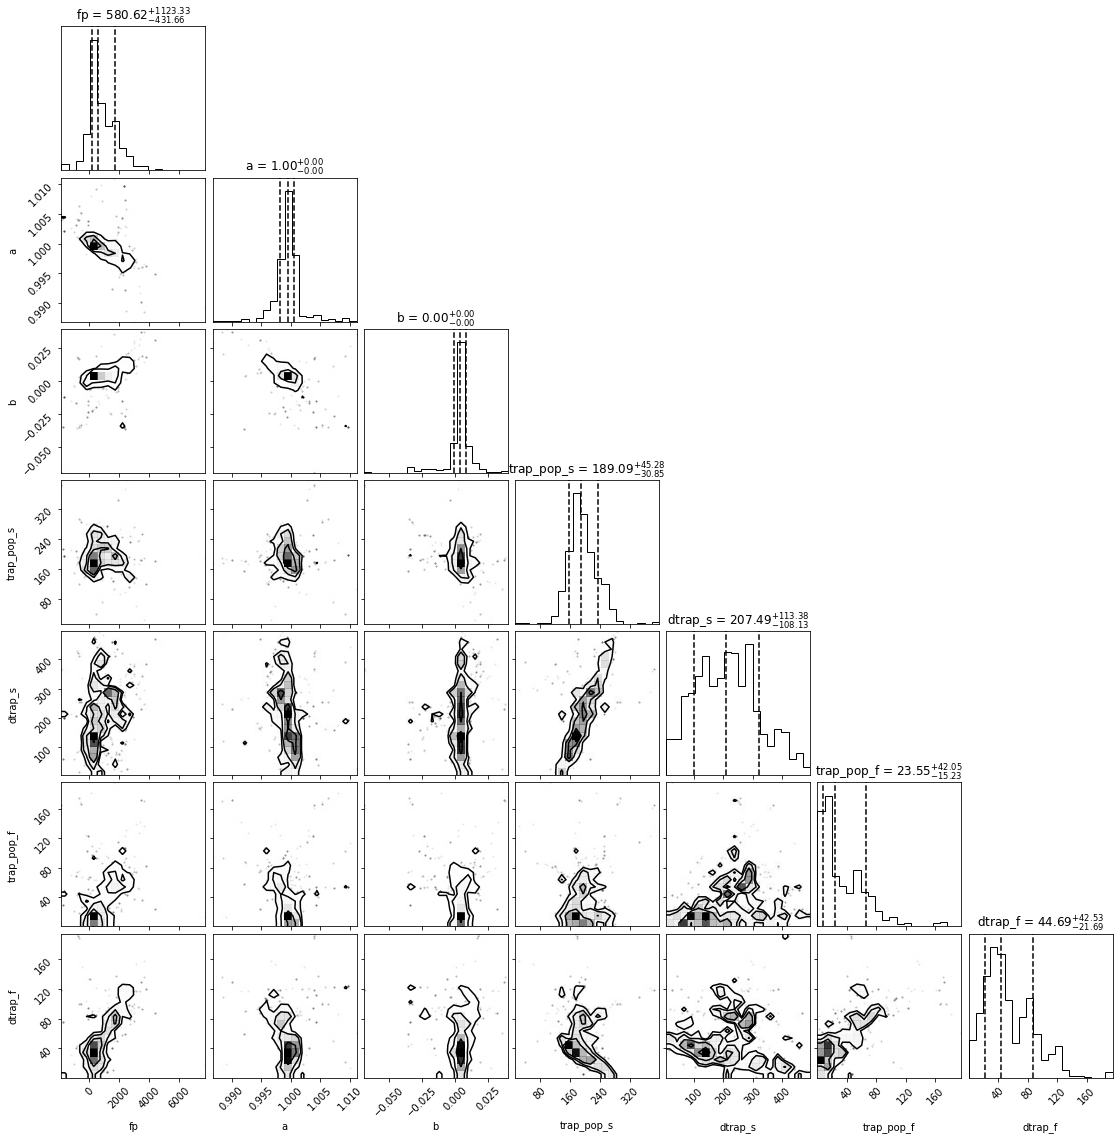

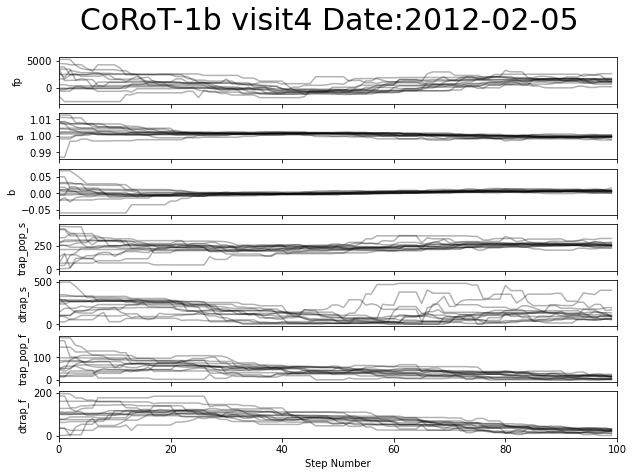

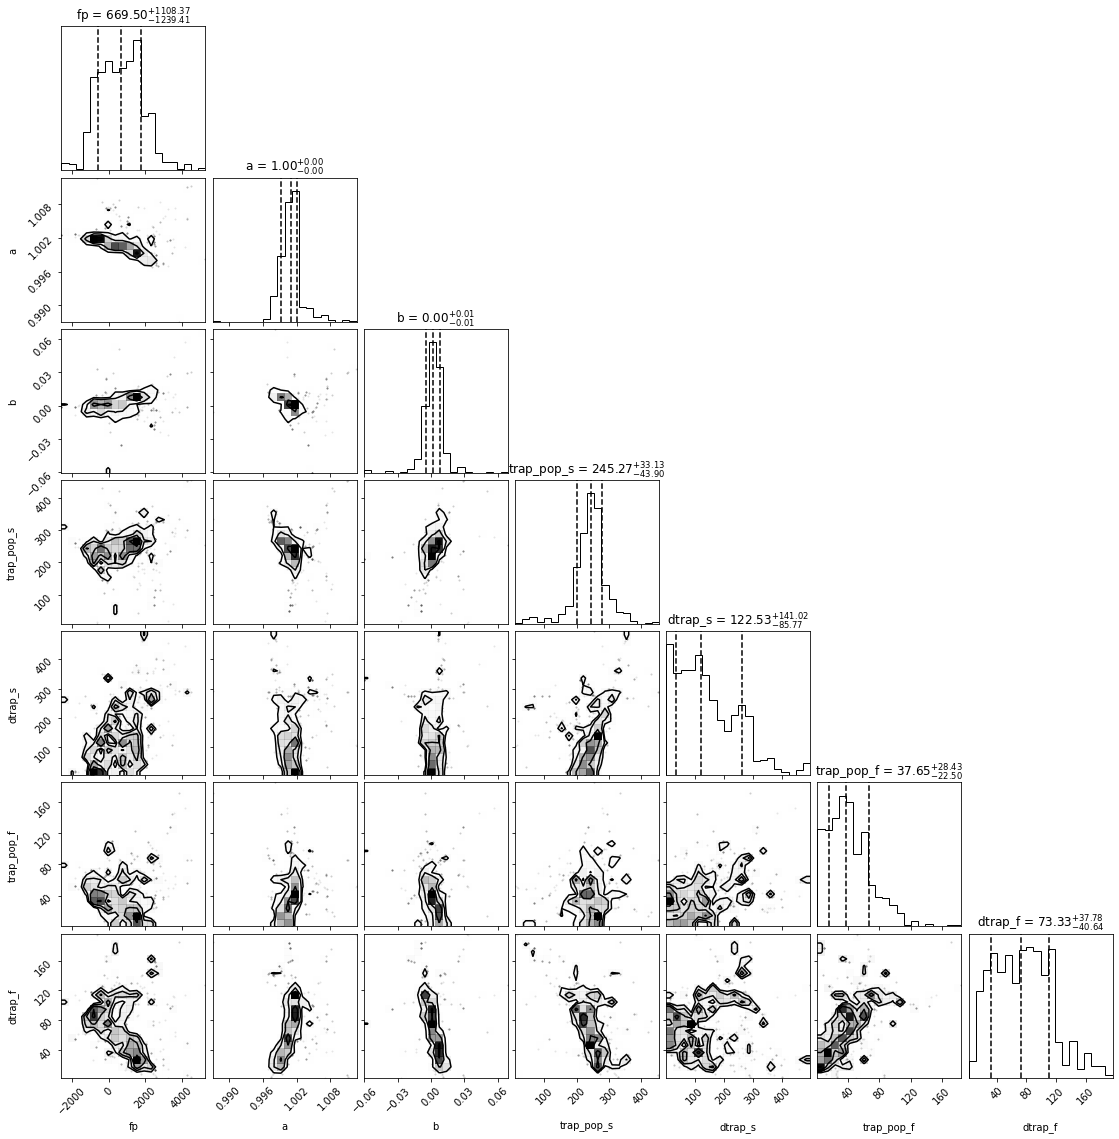

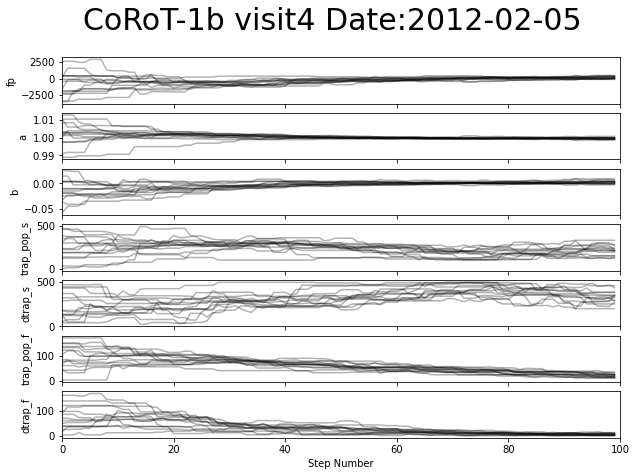

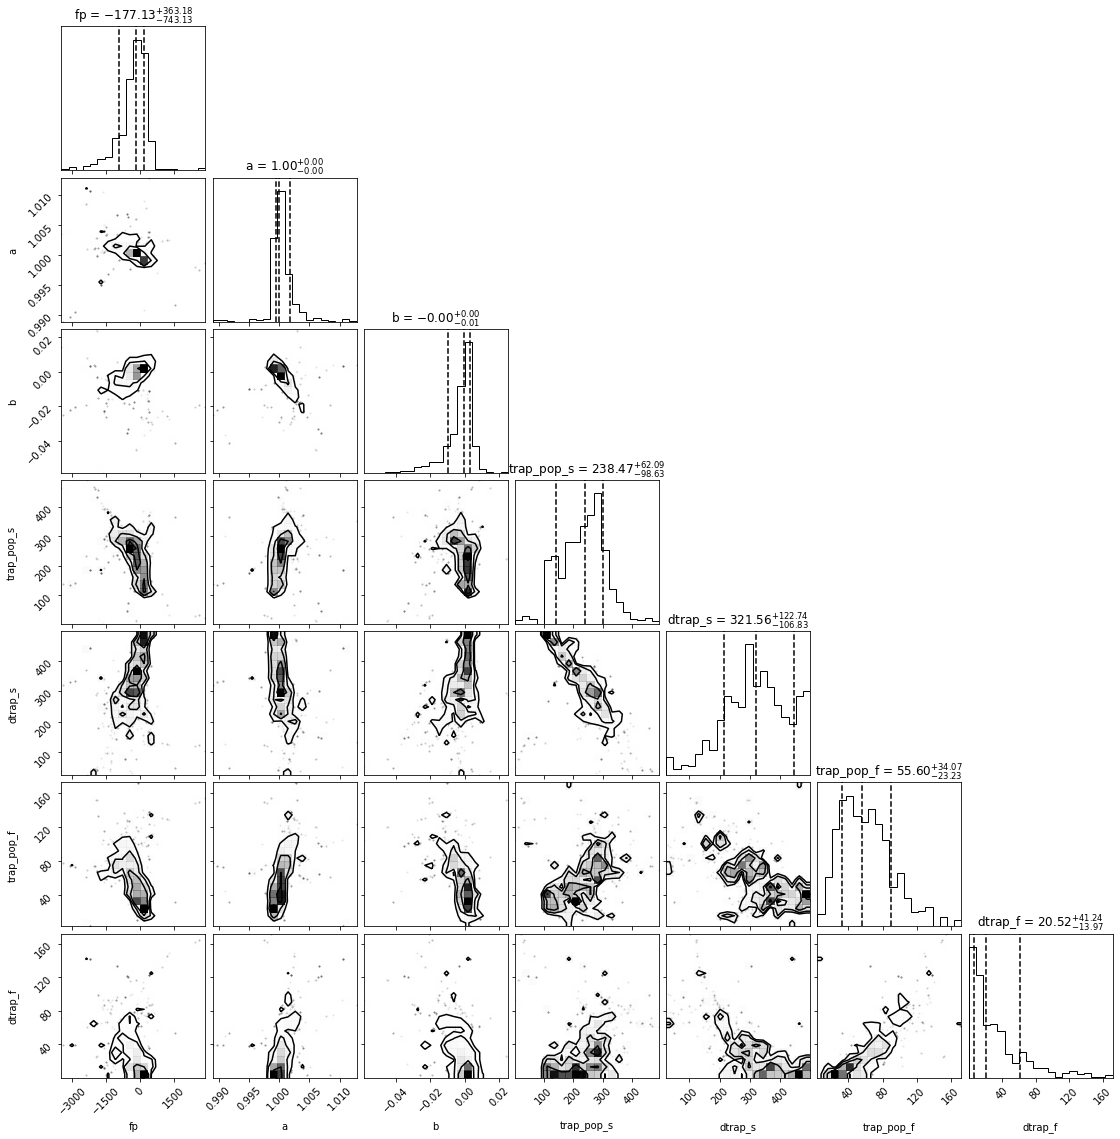

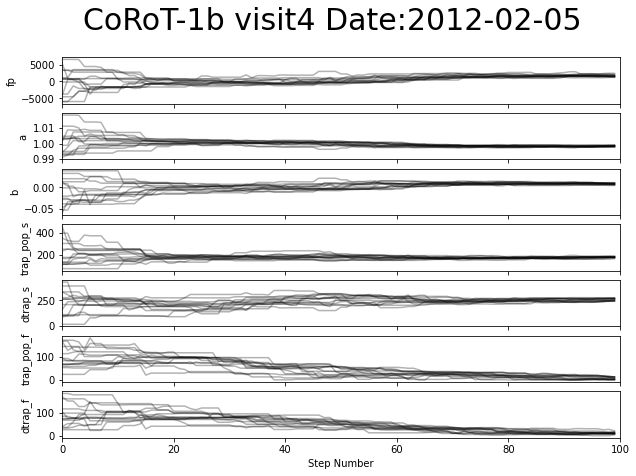

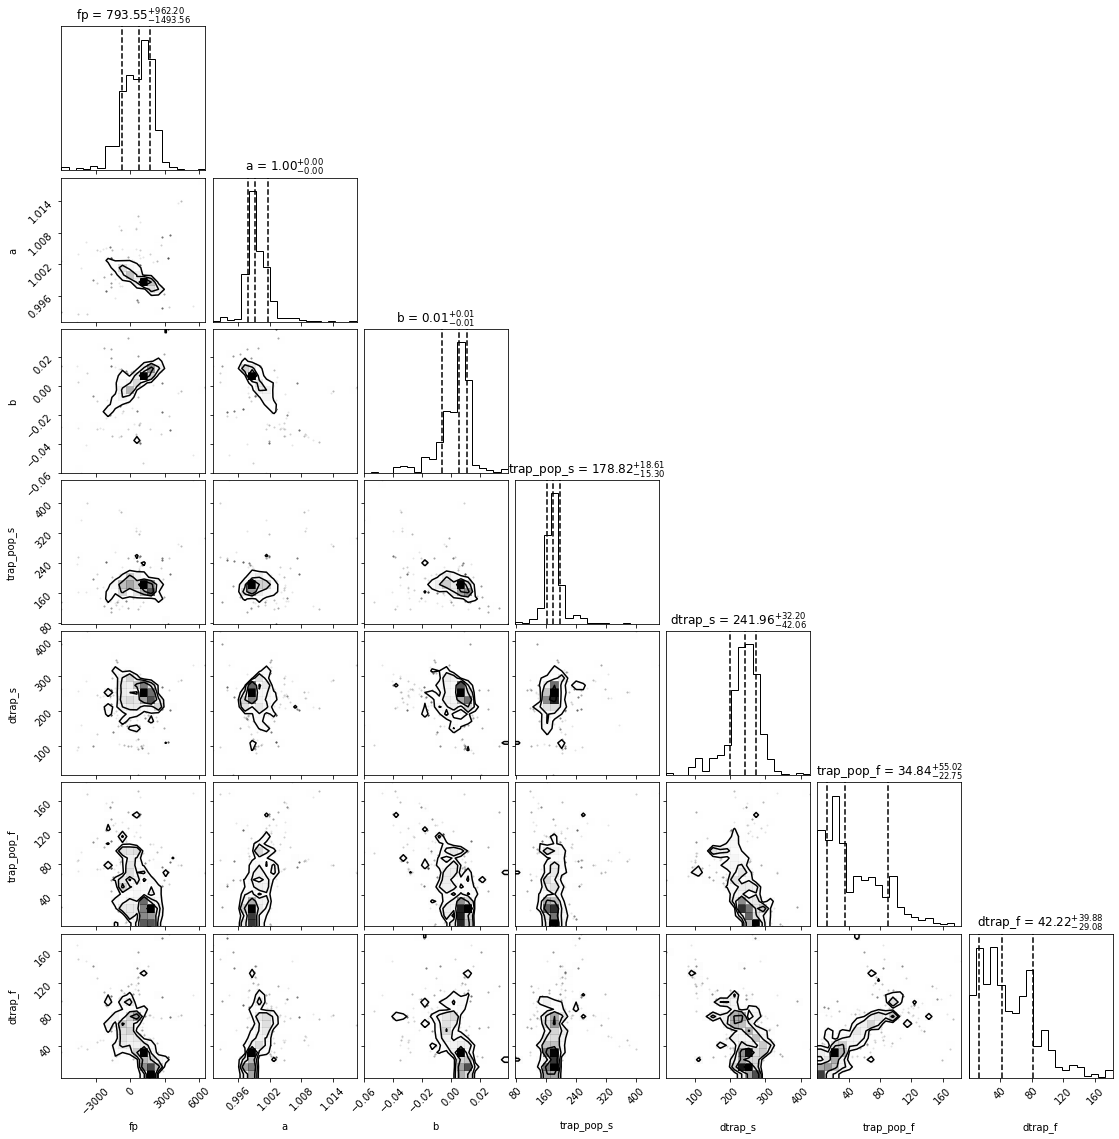

In [8]:
%matplotlib inline
lc_obj_4.MCMC(spec_v4, lc_obj_4.eclipse_model_RECTE, 100, int_guess=[700,1.0,0.0, 200, 200, 20, 0], nbins=10, recalculate=False, showPlot=True, LCPlot=True)